In [26]:
import pandas as pd
import seaborn as sns
import numpy as np

### Практическое задание 0
1. Подгрузите датасет с продажами мобильных телефонов
2. Оцените среднее и стандартное отклонение возраста покупателей
3. Постройте 95% доверительный интервал для рассчитанного среднего
4. Создайте выборку из 30 средних, полученных из выборок размером в 100 из датасета
5. Постройте посчитанные интервалы вместе с гистограммой распределения средних на графике

### Реализация Python для доверительных интервалов

#### Шаг 1: Импорт необходимых библиотек

In [25]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

#### Шаг 2: Определите выборку

In [27]:
# Генерируем выборку
np.random.seed(0) # Для воспроизводимости
data = np.random.normal(loc=100, scale=15, size=50) # loc=mean, scale=std, size=размер выборки
data

array([126.46078519, 106.00235813, 114.68106976, 133.61339799,
       128.01336985,  85.3408318 , 114.25132626,  97.72964188,
        98.45171722, 106.15897753, 102.16065357, 121.8141026 ,
       111.41556588, 101.82512525, 106.65794849, 105.00511491,
       122.4111861 ,  96.92262604, 104.69601552,  87.18856391,
        61.70515276, 109.80427893, 112.96654298,  88.86752469,
       134.04631936,  78.18451488, 100.68637776,  97.19224225,
       122.99168822, 122.04038155, 102.32421139, 105.67243779,
        86.68321379,  70.28805298,  94.78131776, 102.34523454,
       118.45436021, 118.03569773,  94.19009774,  95.46545874,
        84.27170552,  78.69973094,  74.40594714, 129.26163093,
        92.35521727,  93.42888548,  81.2080696 , 111.66235534,
        75.79153229,  96.8088958 ])

#### Шаг 3 
Рассчитайте доверительный интервал для небольшого размера выборки (n < 30) с помощью t-распределения
Для небольших размеров выборки мы используем t-распределение для расчета доверительного интервала.


In [35]:
# Рассчитайте среднее значение и стандартную ошибку среднего
mean = np.mean(data)
sem = st.sem(data) # Стандартная ошибка среднего

# Определите доверительный интервал
confidence = 0.95

# Вычислить доверительный интервал
ci = st.t.interval(confidence=confidence, df=len(data)-1, loc=mean, scale=sem)

print(f"95% доверительный интервал (с использованием t-распределения): {ci}")

95% доверительный интервал (с использованием t-распределения): (97.26162554113152, 106.95515262826144)


#### Шаг 4 
Вычислите доверительный интервал для большой выборки (n >= 30) с помощью нормального распределения

In [33]:
# Для больших наборов данных мы можем использовать нормальное распределение
ci_large = st.norm.interval(confidence=confidence, loc=mean, scale=sem)

print(f"95% доверительный интервал (с использованием нормального распределения): {ci_large}")

95% доверительный интервал (с использованием нормального распределения): (97.38127968170684, 106.83549848768612)


#### Шаг 5: Визуализация доверительных интервалов

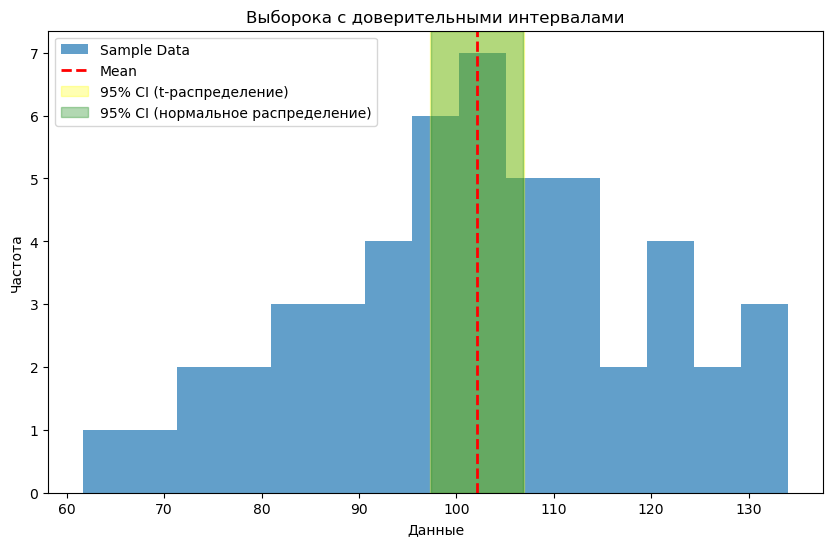

In [38]:
# Построение графика данных выборки
plt.figure(figsize=(10, 6))
plt.hist(data, bins=15, alpha=0.7, label='Sample Data')

# Построение графика среднего значения
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')

# Выделение доверительного интервала
plt.axvspan(ci[0], ci[1], color='yellow', alpha=0.3, label='95% CI (t-распределение)')
plt.axvspan(ci_large[0], ci_large[1], color='green', alpha=0.3, label='95% CI (нормальное распределение)')

plt.xlabel('Данные')
plt.ylabel('Частота')
plt.title('Выборока с доверительными интервалами')
plt.legend()
plt.show()

### Практическое задание 1
1. Подгрузите датасет с продажами мобильных телефонов
2. Отфильтруйте датасет так, чтобы в нем остались только покупки, сделанные женщинами, онлайн, в январе 2024-го года
3. Рассчитайте суммарное количество проданной продукции за каждый день (UnitsSold)
4. Постройте 95% доверительный интервал для рассчитанного среднего (с помощью t-распределения). Визуализируйте его на графике.
5. Постройте 95% доверительный интервал для рассчитанного среднего (с помощью нормального распределения). Визуализируйте его на том же графике
6. Сравните полученные интервалы
7. Увеличьте количество степеней свободы в t-распределении. Как меняются интервалы?

### Практическое задание 2
1. Подгрузите датасет с продажами мобильных телефонов
2. C помощью функции np.random.choice поделите покупателей на группы
3. Разделите датасет на 2 группы - продажи до мая 2024-го и после
4. С помощью случайных распределений смоделируйте воздействие на одну из групп после мая 2024-го
5. Постройте распределение продаж нулевой группы до мая 2024-го
6. Проверьте 2 гипотезы о равенстве среднего распределения определенному числу
7. Проверьте гипотезу о равенстве средних групп до воздействия (сформулируйте нулевую и альернативную гипотезу)
8. Проверьте гипотезу о равенстве групп после воздействия (сформулируйте нулевую и альернативную гипотезу)
9. Измените воздействие так, чтобы результат проверки гипотезы в пункте 8 тоже изменился

### Разбор ДЗ№13

In [4]:
import plotly.express as px
import plotly.graph_objects as go

#### Задание 1: Расширенная диаграмма рассеяния

Создать диаграмму рассеивания с дополнительной сложностью для визуализации взаимосвязи между двумя переменными. Используйте набор данных tips, доступный в Plotly Express. Постройте график total_bill на оси x и tip на оси y. Раскрасьте точки по времени (обед или ужин). Добавьте на график линию тренда и настройте размер маркеров в зависимости от размера вечеринки.

In [5]:
df = px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


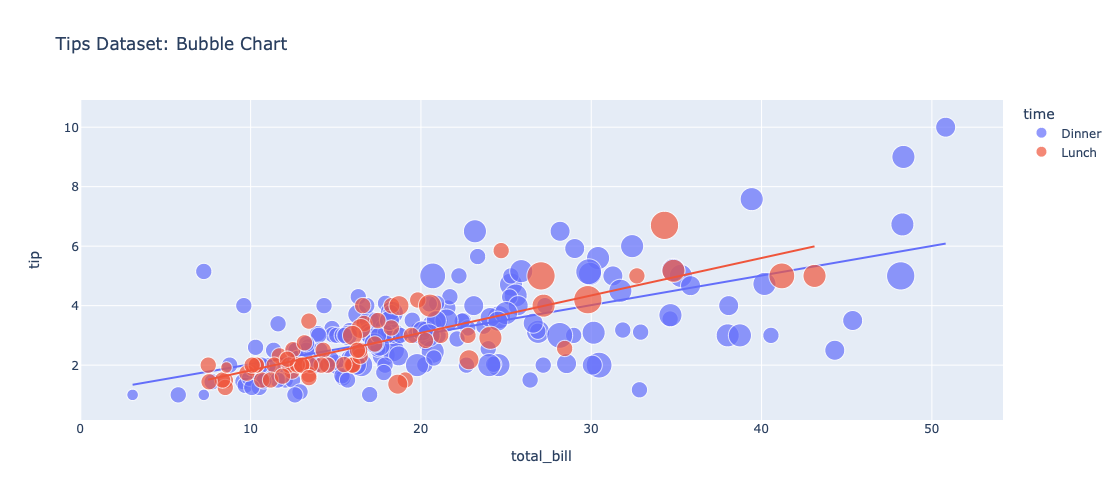

In [12]:
fig = px.scatter(
    df, 
    x='total_bill', 
    y='tip', 
    color='time',
    size='size', 
    trendline='ols',
    title='Tips Dataset: Bubble Chart'
)

fig.update_layout(
    width=1000,  # Ширина
    height=500  # Высота
)

fig.show()

#### Задача 2: Создать гистограмму с расширенными возможностями настройки. 

Используйте набор данных tips. Создайте гистограмму для total_bill. Установите число бинов на 20 и цвет по времени.

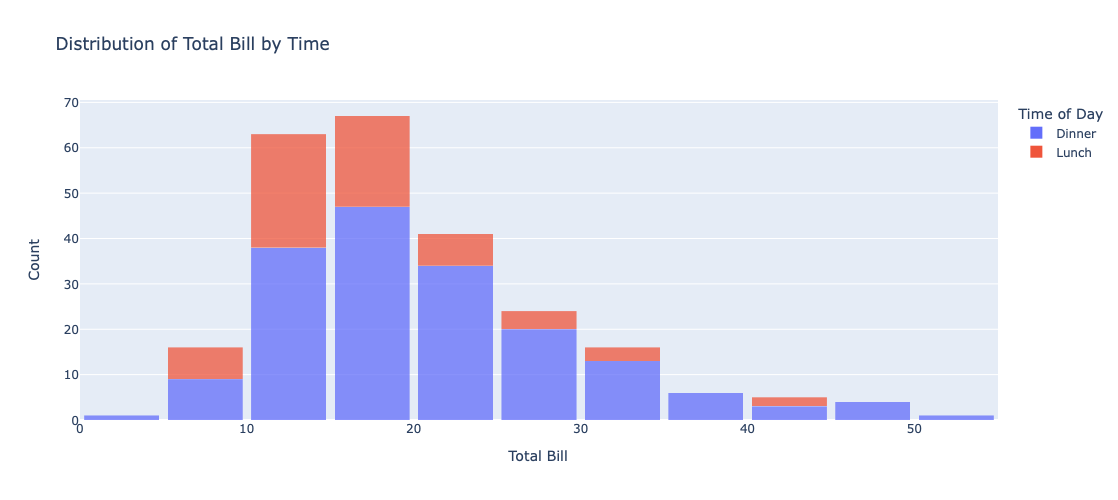

In [14]:
fig = px.histogram(
    df, 
    x='total_bill', 
    nbins=20, 
    color='time',  # Цвет будет зависеть от времени ('Lunch' или 'Dinner')
    title='Distribution of Total Bill by Time',
    labels={'total_bill': 'Total Bill', 'time': 'Time of Day'},
    opacity=0.75
)

# Настройка дополнительных параметров
fig.update_layout(
    xaxis_title='Total Bill',
    yaxis_title='Count',
    bargap=0.1)

fig.update_layout(
    width=1000,  # Ширина
    height=500  # Высота
)

fig.show()

#### Задача 3: Создайте линейный график с несколькими линиями для сравнения тенденций. 

Используйте набор данных gapminder, доступный в Plotly Express. Отметьте год на оси x и gdpPercap на оси y. Отфильтруйте данные, чтобы включить в них только страны "Канада" и "Германия". Используйте разные стили линий для каждой страны.

In [15]:
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [16]:
df = df[
    df['country'].isin(['Germany', 'Canada'])
].reset_index(drop=True)
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Canada,Americas,1952,68.75,14785584,11367.16112,CAN,124
1,Canada,Americas,1957,69.96,17010154,12489.95006,CAN,124
2,Canada,Americas,1962,71.30,18985849,13462.48555,CAN,124
3,Canada,Americas,1967,72.13,20819767,16076.58803,CAN,124
4,Canada,Americas,1972,72.88,22284500,18970.57086,CAN,124


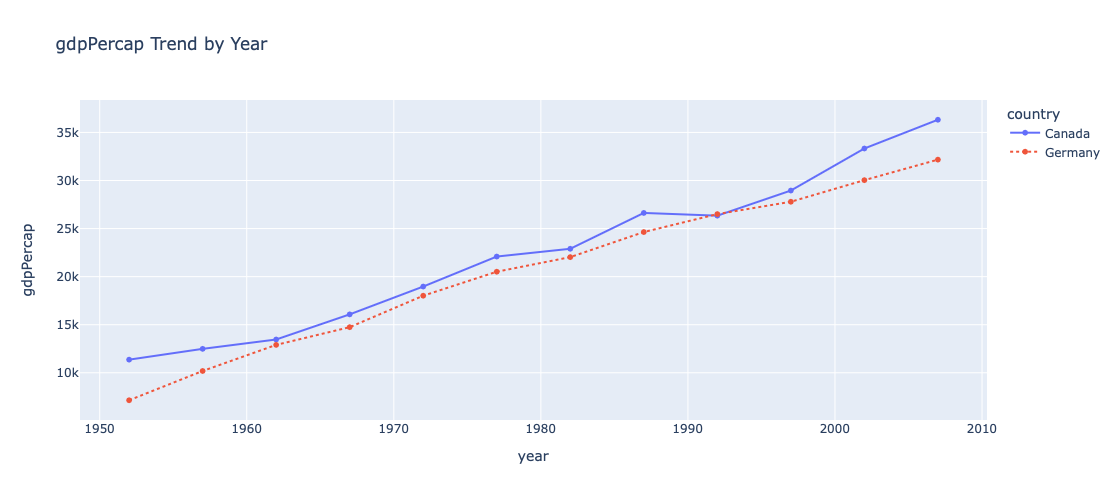

In [19]:
fig = px.line(
    df, 
    x='year', 
    y='gdpPercap', 
    color='country', 
    title='gdpPercap Trend by Year',
    markers=True, 
    line_dash='country'
    )

fig.update_layout(
    width=1000,  # Ширина
    height=500  # Высота
)

fig.show()

#### Задача 4: Создать тепловую карту для визуализации корреляции между несколькими переменными с помощью интерактивных функций. 

Используйте набор данных iris, доступный в Plotly Express. Рассчитайте корреляционную матрицу и визуализируйте ее с помощью тепловой карты. Добавьте наведенную информацию, показывающую значения корреляции.

In [20]:
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [22]:
df = df.drop(columns=['species'])
df_corr = df.corr()
df_corr

,sepal_length,sepal_width,petal_length,petal_width,species_id
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species_id,0.782561,-0.419446,0.949043,0.956464,1.000000


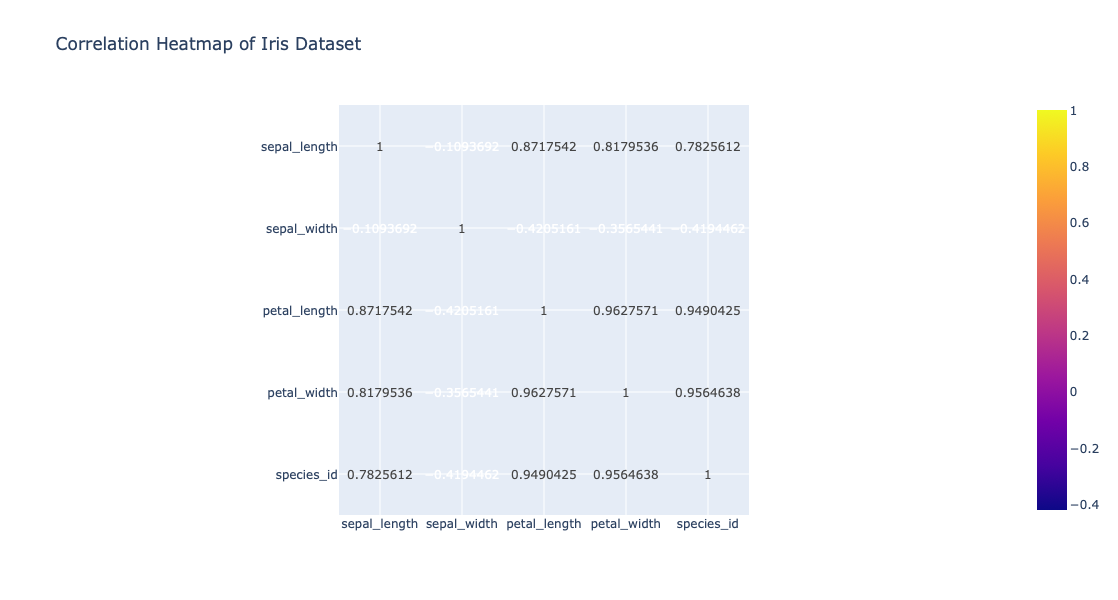

In [23]:
fig = px.imshow(
    df_corr, 
    text_auto=True, 
    title='Correlation Heatmap of Iris Dataset'
)
fig.update_layout(width=600, height=600)
fig.show()

### Разбор ДЗ№14